## Multiple Logistic Regression analysis 
### On Diabeties prediction

### Aim:
- To find the predict whether patients has diabetes or not.

Outline:                
1. Explore the dataset using pandas framework.
2. Visualize the dataset using matplotlib,seabon library.
3. Perform multiple logistic regression.
4. Build model using 'train-test-split method'.

About dataset:
Dataset 'diabetes details' is refere from the kaggle dataset.
reference link:https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database.

Dataset contains:
1. Pregnancies: To express the Number of pregnancies
2. Glucose: To express the Glucose level in blood
3. BloodPressure: To express the Blood pressure measurement
4. SkinThickness: To express the thickness of the skin
5. Insulin: To express the Insulin level in blood
6. BMI: To express the Body mass index
7. DiabetesPedigreeFunction: To express the Diabetes percentage
8. Age: To express the age
9. Outcome: To express the final result 1 is Yes and 0 is No

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Find size and shape of data

In [4]:
df.shape

(768, 9)

In [5]:
df.size

6912

#### Datatypes present in the data

In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Attributes information is as:

In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Check if data contains any null value

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see, the data contains no null values.

#### Drop unnessesary attributes

In [7]:
df.drop(['SkinThickness'],axis=1,inplace=True)

In [8]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


#### Describe the dataset

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Show the 1st and last raws of the dataset

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [12]:
df.tail()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1
767,1,93,70,0,30.4,0.315,23,0


#### Data Exploration
lets explore the data

In [13]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [36]:
def bmi(content):
    if content<27.300000:
        return 'low'
    elif content< 32.000000:
        return 'medium'
    else:
        return 'high'

In [37]:
df['BMI']=df['BMI'].apply(bmi)

#### Use the cross tables

In [22]:
df_bmi= pd.crosstab(df['BMI'],df['Outcome'])
df_bmi

Outcome,0,1
BMI,,
high,211,184
low,170,20
medium,119,64


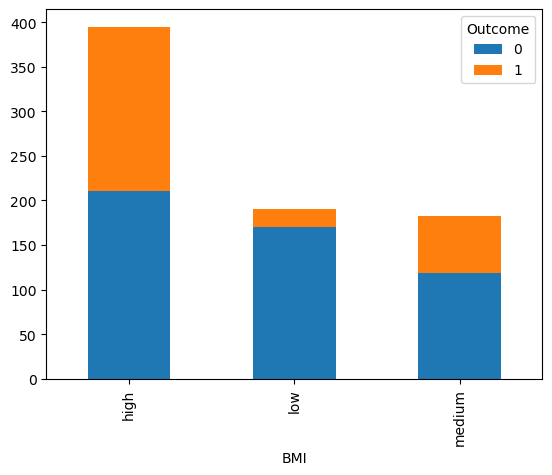

In [38]:
df_bmi.plot(kind='bar',stacked=True)
plt.show()

#### Observation:
- Higher BMI contains the higher risk of diabetics.

In [40]:
df_pre= pd.crosstab(df['Pregnancies'],df['Outcome'])
df_pre

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


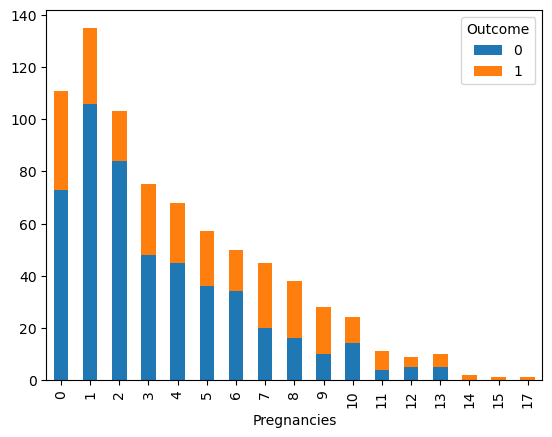

In [41]:
df_pre.plot(kind='bar',stacked=True)
plt.show()

#### Observation:
- As the pregnancies increases diabetes risk increases.
- less pregnancies less risk.

In [44]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [45]:
def glucose(content):
    if content<99.000000:
        return 'low'
    elif content <117.000000:
        return 'medium'
    else:
        return 'high'

In [46]:
df['Glucose']=df['Glucose'].apply(glucose)

In [47]:
df_glu= pd.crosstab(df['Glucose'],df['Outcome'])
df_glu

Outcome,0,1
Glucose,,
high,182,206
low,164,16
medium,154,46


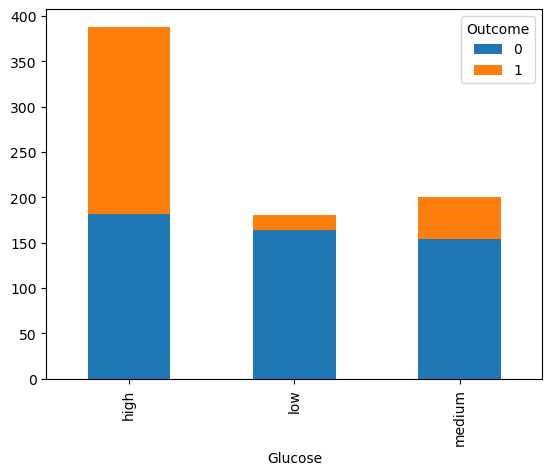

In [48]:
df_glu.plot(kind='bar',stacked=True)
plt.show()

#### Observation:
- As glucose is directly proportstional to diabetes, more glucose has higher changes of causing diabetes.

In [15]:
df_age= pd.crosstab(df['Age'],df['Outcome'])
df_age

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


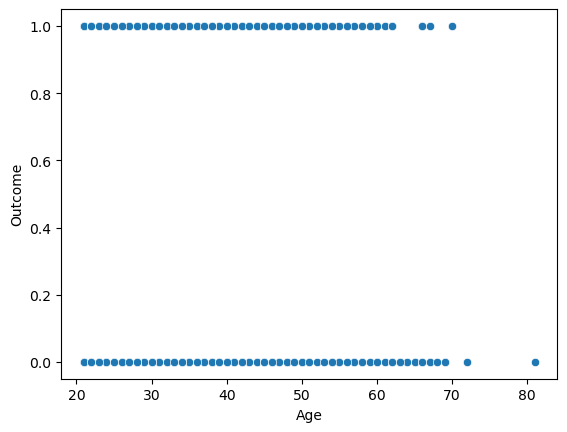

In [27]:
sns.scatterplot('Age','Outcome',data=df)
plt.show()

### Data Modelling
As data has more number of independent attributes which are important to predict the diabetes.Here use,
#### Multiple logistic model

#### Logistic Regression:
- Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class.
-  It takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. 

#### Analyze the model for logistic regression using Train-Test-Split Method.
Train Dataset: Used to fit the machine learning model.                                                
Test Dataset: Used to evaluate the fit machine learning model.

#### Prepare X and y

In [29]:
X= df.drop(['Outcome'],axis=1).values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [30]:
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

#### Apply train, test to x and y 
Here we are using training set with the size of 0.66 (66 percent) means that the remainder percentage 0.25 (25 percent) is assigned to the test set.

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#### Print the shape for train and test data.

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 7)
(192, 7)
(576,)
(192,)


#### Apply logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()
model

LogisticRegression()

#### Fit the model

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

#### Predict the y value

In [42]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [43]:
y_test

744    0
671    0
474    0
392    0
153    0
      ..
207    1
403    0
117    0
457    0
476    1
Name: Outcome, Length: 192, dtype: int64

#### New dataframe for actual and predicted values as:

In [45]:
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
new_df

,Actual,Predicted
744,0,1
671,0,0
474,0,0
392,0,0
153,0,1
...,...,...
207,1,1
403,0,0
117,0,0
457,0,0


#### Predict x values

In [47]:
x_pred=model.predict(X_train)
x_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

#### Now, let's check for the accuracy of logistic model.

In [49]:
acc=model.score(X_train,y_train)
acc*100

77.77777777777779

##### Model has 77.779% accuracy for train data.

In [51]:
acc=model.score(X_test,y_test)
acc*100

79.16666666666666

#### For accurary check:

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc=accuracy_score(y_test,y_predict)
acc

0.7916666666666666

##### Model has 79.116% accuracy for test data.

#### Draw the classification report

In [55]:
from sklearn.metrics import classification_report

In [56]:
report =classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       138
           1       0.65      0.57      0.61        54

    accuracy                           0.79       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.79      0.79      0.79       192



### Final Conclusion:
-  Overall accuracy of the model is 79.116% which is good.
- Train Test Split method on logistic regression model fits good.